In [2]:
import sys
sys.path.append("../src/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import config


In [22]:
df = pd.read_excel(config.TRAINING_FILE, na_values='nan')
df.drop(['CUS_DOB', "CUS_Customer_Since"], axis=1, inplace=True)
df.drop('CIF', axis=1, inplace=True)
df.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,25,277,265,345,1459126.64,1230543.08,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,14,37,15,45,35372.55,20134.00,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,14,31,14,8,28248.85,4777.66,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,14,0,1,0,0.00,4000.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,5,15,33,12,69083.38,223007.51,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CUS_DOB                             1249 non-null   object        
 1   AGE                                 1249 non-null   int64         
 2   CUS_Month_Income                    1238 non-null   float64       
 3   CUS_Gender                          1247 non-null   object        
 4   CUS_Marital_Status                  1249 non-null   object        
 5   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 6   YEARS_WITH_US                       1249 non-null   int64         
 7   # total debit transactions for S1   1249 non-null   int64         
 8   # total debit transactions for S2   1249 non-null   int64         
 9   # total debit transactions for S3   1249 non-null   int64         
 10  total debit amount for S

In [10]:

new_cols_name = {
    'CUS_DOB' : "cus_dob",
    'AGE' : "age",
    'CUS_Month_Income' : "cus_month_income",
    'CUS_Gender' : "cus_gender",
    'CUS_Marital_Status' : "cus_marital_status",
    'CUS_Customer_Since' : "cus_customer_since",
    'YEARS_WITH_US' : "years_with_us",
    '# total debit transactions for S1':"total_debit_trans_s1",
    '# total debit transactions for S2':"total_debit_trans_s2",
    '# total debit transactions for S3':"total_debit_trans_s3", 
    'total debit amount for S1':"total_debit_amt_s1",
    'total debit amount for S2': "total_debit_amt_s2", 
    'total debit amount for S3' : "total_debit_amt_s3",
    '# total credit transactions for S1' : "total_credit_trans_s1",
    '# total credit transactions for S2': "total_credit_trans_s2",
    '# total credit transactions for S3': "total_credit_trans_s3", 
    'total credit amount for S1' : "total_credit_amt_s1",
    'total credit amount for S2':"total_credit_amt_s2",
    'total credit amount for S3':"total_credit_amt_s3",
    'total debit amount': "total_debit_amt", 
    'total debit transactions': "total_debit_trans", 
    'total credit amount': "total_credit_amt",
    'total credit transactions' : "total_credit_trans", 
    'total transactions': "total_transactions", 
    'CUS_Target' : "cus_target",
    'TAR_Desc' : "tar_desc",
    'Status' : "status"
}

df.rename(columns=new_cols_name, inplace=True)

In [11]:
df.columns

Index(['cus_dob', 'age', 'cus_month_income', 'cus_gender',
       'cus_marital_status', 'cus_customer_since', 'years_with_us',
       'total_debit_trans_s1', 'total_debit_trans_s2', 'total_debit_trans_s3',
       'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3',
       'total_credit_trans_s1', 'total_credit_trans_s2',
       'total_credit_trans_s3', 'total_credit_amt_s1', 'total_credit_amt_s2',
       'total_credit_amt_s3', 'total_debit_amt', 'total_debit_trans',
       'total_credit_amt', 'total_credit_trans', 'total_transactions',
       'cus_target', 'tar_desc', 'status'],
      dtype='object')

In [12]:
df.isnull().sum()

cus_dob                   0
age                       0
cus_month_income         11
cus_gender                2
cus_marital_status        0
cus_customer_since        0
years_with_us             0
total_debit_trans_s1      0
total_debit_trans_s2      0
total_debit_trans_s3      0
total_debit_amt_s1        0
total_debit_amt_s2        0
total_debit_amt_s3        0
total_credit_trans_s1     0
total_credit_trans_s2     0
total_credit_trans_s3     0
total_credit_amt_s1       0
total_credit_amt_s2       0
total_credit_amt_s3       0
total_debit_amt           0
total_debit_trans         0
total_credit_amt          0
total_credit_trans        0
total_transactions        0
cus_target                0
tar_desc                  0
status                    0
dtype: int64

In [13]:
# Extracting all the null values in the cus_month_income features
df[df.cus_month_income.isnull()]

,cus_dob,age,cus_month_income,cus_gender,cus_marital_status,cus_customer_since,years_with_us,total_debit_trans_s1,total_debit_trans_s2,total_debit_trans_s3,...,total_credit_amt_s2,total_credit_amt_s3,total_debit_amt,total_debit_trans,total_credit_amt,total_credit_trans,total_transactions,cus_target,tar_desc,status
85,Apr 3 1957 12:00AM,62,NaN,FEMALE,SINGLE,1996-05-07,23,21,17,9,...,0.00,0.00,82043.30,47,0.00,0,47,2223,LOW,ACTIVE
99,Dec 31 1953 12:00AM,66,NaN,FEMALE,MARRIED,1998-01-20,21,11,25,22,...,24294.55,26893.50,101900.00,58,75482.60,32,90,2223,LOW,ACTIVE
184,Jan 1 1900 12:00AM,119,NaN,NaN,MARRIED,1998-01-20,21,4,4,1,...,2000.00,0.00,18649.30,9,2000.00,1,10,2223,LOW,CHURN
316,Jan 2 1975 12:00AM,44,NaN,MALE,SINGLE,2005-05-26,14,0,2,0,...,0.00,0.00,1000.00,2,0.00,0,2,2222,MIDLE,CHURN
368,May 7 1976 12:00AM,43,NaN,MALE,SINGLE,2005-06-07,14,22,56,23,...,125400.78,41800.26,229406.14,101,250801.56,12,113,2222,MIDLE,ACTIVE
400,Jul 15 1963 12:00AM,56,NaN,MALE,SINGLE,1995-03-17,24,26,20,0,...,0.00,0.00,297687.54,46,0.00,0,46,2222,MIDLE,CHURN
427,Dec 7 1963 12:00AM,56,NaN,MALE,SINGLE,1991-11-09,28,9,14,2,...,18550.72,0.00,26745.00,25,18550.72,1,26,2223,LOW,ACTIVE
857,Feb 2 1961 12:00AM,58,NaN,FEMALE,SINGLE,1997-01-13,22,37,68,47,...,80679.78,180922.70,276279.95,152,261602.48,8,160,2223,LOW,ACTIVE
938,Mar 13 1976 12:00AM,43,NaN,FEMALE,MARRIED,1996-07-25,23,6,6,9,...,0.00,2900.00,9751.20,21,2900.00,1,22,2222,MIDLE,ACTIVE
996,Jan 1 1900 12:00AM,119,NaN,NaN,SINGLE,1998-01-07,21,27,0,0,...,0.00,0.00,43318.00,27,39250.86,5,32,2233,LOW,CHURN


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data_for_clustering = df[['age', 'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3', 'total_credit_amt_s1', 'total_credit_amt_s2', 'total_credit_amt_s3']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)

missing_data = df[df['cus_month_income'].isnull()]
missing_data_for_clustering = missing_data[['age', 'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3', 'total_credit_amt_s1', 'total_credit_amt_s2', 'total_credit_amt_s3']]
scaled_missing_data = scaler.transform(missing_data_for_clustering)
missing_data['cluster_label'] = kmeans.predict(scaled_missing_data)

for cluster_label in missing_data['cluster_label'].unique():
    cluster_centroid = kmeans.cluster_centers_[cluster_label]
    missing_data.loc[missing_data['cluster_label'] == cluster_label, 'cus_month_income'] = cluster_centroid[0]  # Assuming 'age' is the first feature

df.update(missing_data)


C:\Users\User\AppData\Local\Temp\ipykernel_10568\1904402163.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['cluster_label'] = kmeans.predict(scaled_missing_data)


why we used KMeans clustering to fill missing values in a bank churn dataset with imbalanced classes, the following explanation:
- using KMeans clustering for missing value imputation in a bank churn dataset with imbalanced classes enables us to preserve data distribution, account for complex relationships between variables, handle imbalanced classes effectively, and ultimately improve the performance of predictive models.

In [15]:
df.cus_month_income

0          7116.64
1       1500000.00
2       5000000.00
3           500.00
4       9000000.00
           ...    
1244       4500.00
1245    3500000.00
1246       1000.00
1247    2000000.00
1248    5000000.00
Name: cus_month_income, Length: 1249, dtype: float64

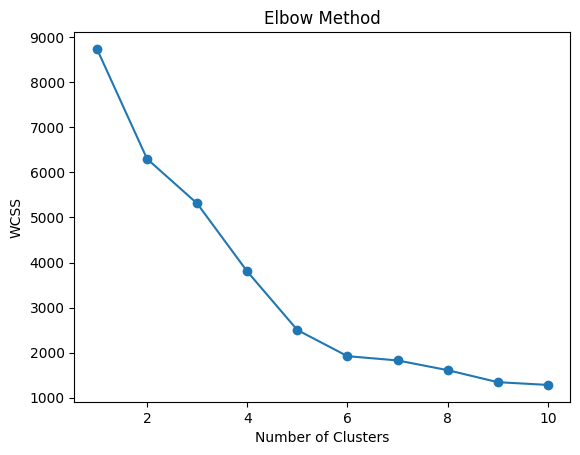

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract relevant columns for clustering
data_for_clustering = df[['age', 'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3', 'total_credit_amt_s1', 'total_credit_amt_s2', 'total_credit_amt_s3']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [17]:
raw_df = pd.read_excel("../data/Raw data/CHURNDATA.xlsx")
raw_df.drop(["CIF","CUS_DOB"], axis=1, inplace=True)
raw_df.head()

,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [18]:
num_df = raw_df.select_dtypes(include='number')
cat_df = raw_df.select_dtypes(include='object')

In [19]:
raw_df.select_dtypes(include='object')

,CUS_Gender,CUS_Marital_Status,TAR_Desc,Status
0,MALE,MARRIED,EXECUTIVE,ACTIVE
1,FEMALE,SINGLE,LOW,ACTIVE
2,FEMALE,SINGLE,MIDLE,ACTIVE
3,FEMALE,SINGLE,LOW,ACTIVE
4,FEMALE,SINGLE,LOW,ACTIVE
...,...,...,...,...
1244,MALE,SINGLE,LOW,CHURN
1245,MALE,SINGLE,MIDLE,ACTIVE
1246,MALE,SINGLE,MIDLE,ACTIVE
1247,MALE,SINGLE,MIDLE,ACTIVE


In [23]:
from sklearn import preprocessing
def label_encode_categorical(df, cols):
    """_summary_
    Args:
        df (dataframe): Input DataFrame with categorical columns.
        cols (list): List of column names to be label encoded.
    """
    df_encoded = df.copy()

    for col in cols:
        le = preprocessing.LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])

    return df_encoded

df_encoded = label_encode_categorical(raw_df, cat_df.columns)

NameError: name 'raw_df' is not defined

In [24]:
df.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'YEARS_WITH_US', '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status'],
      dtype='object')

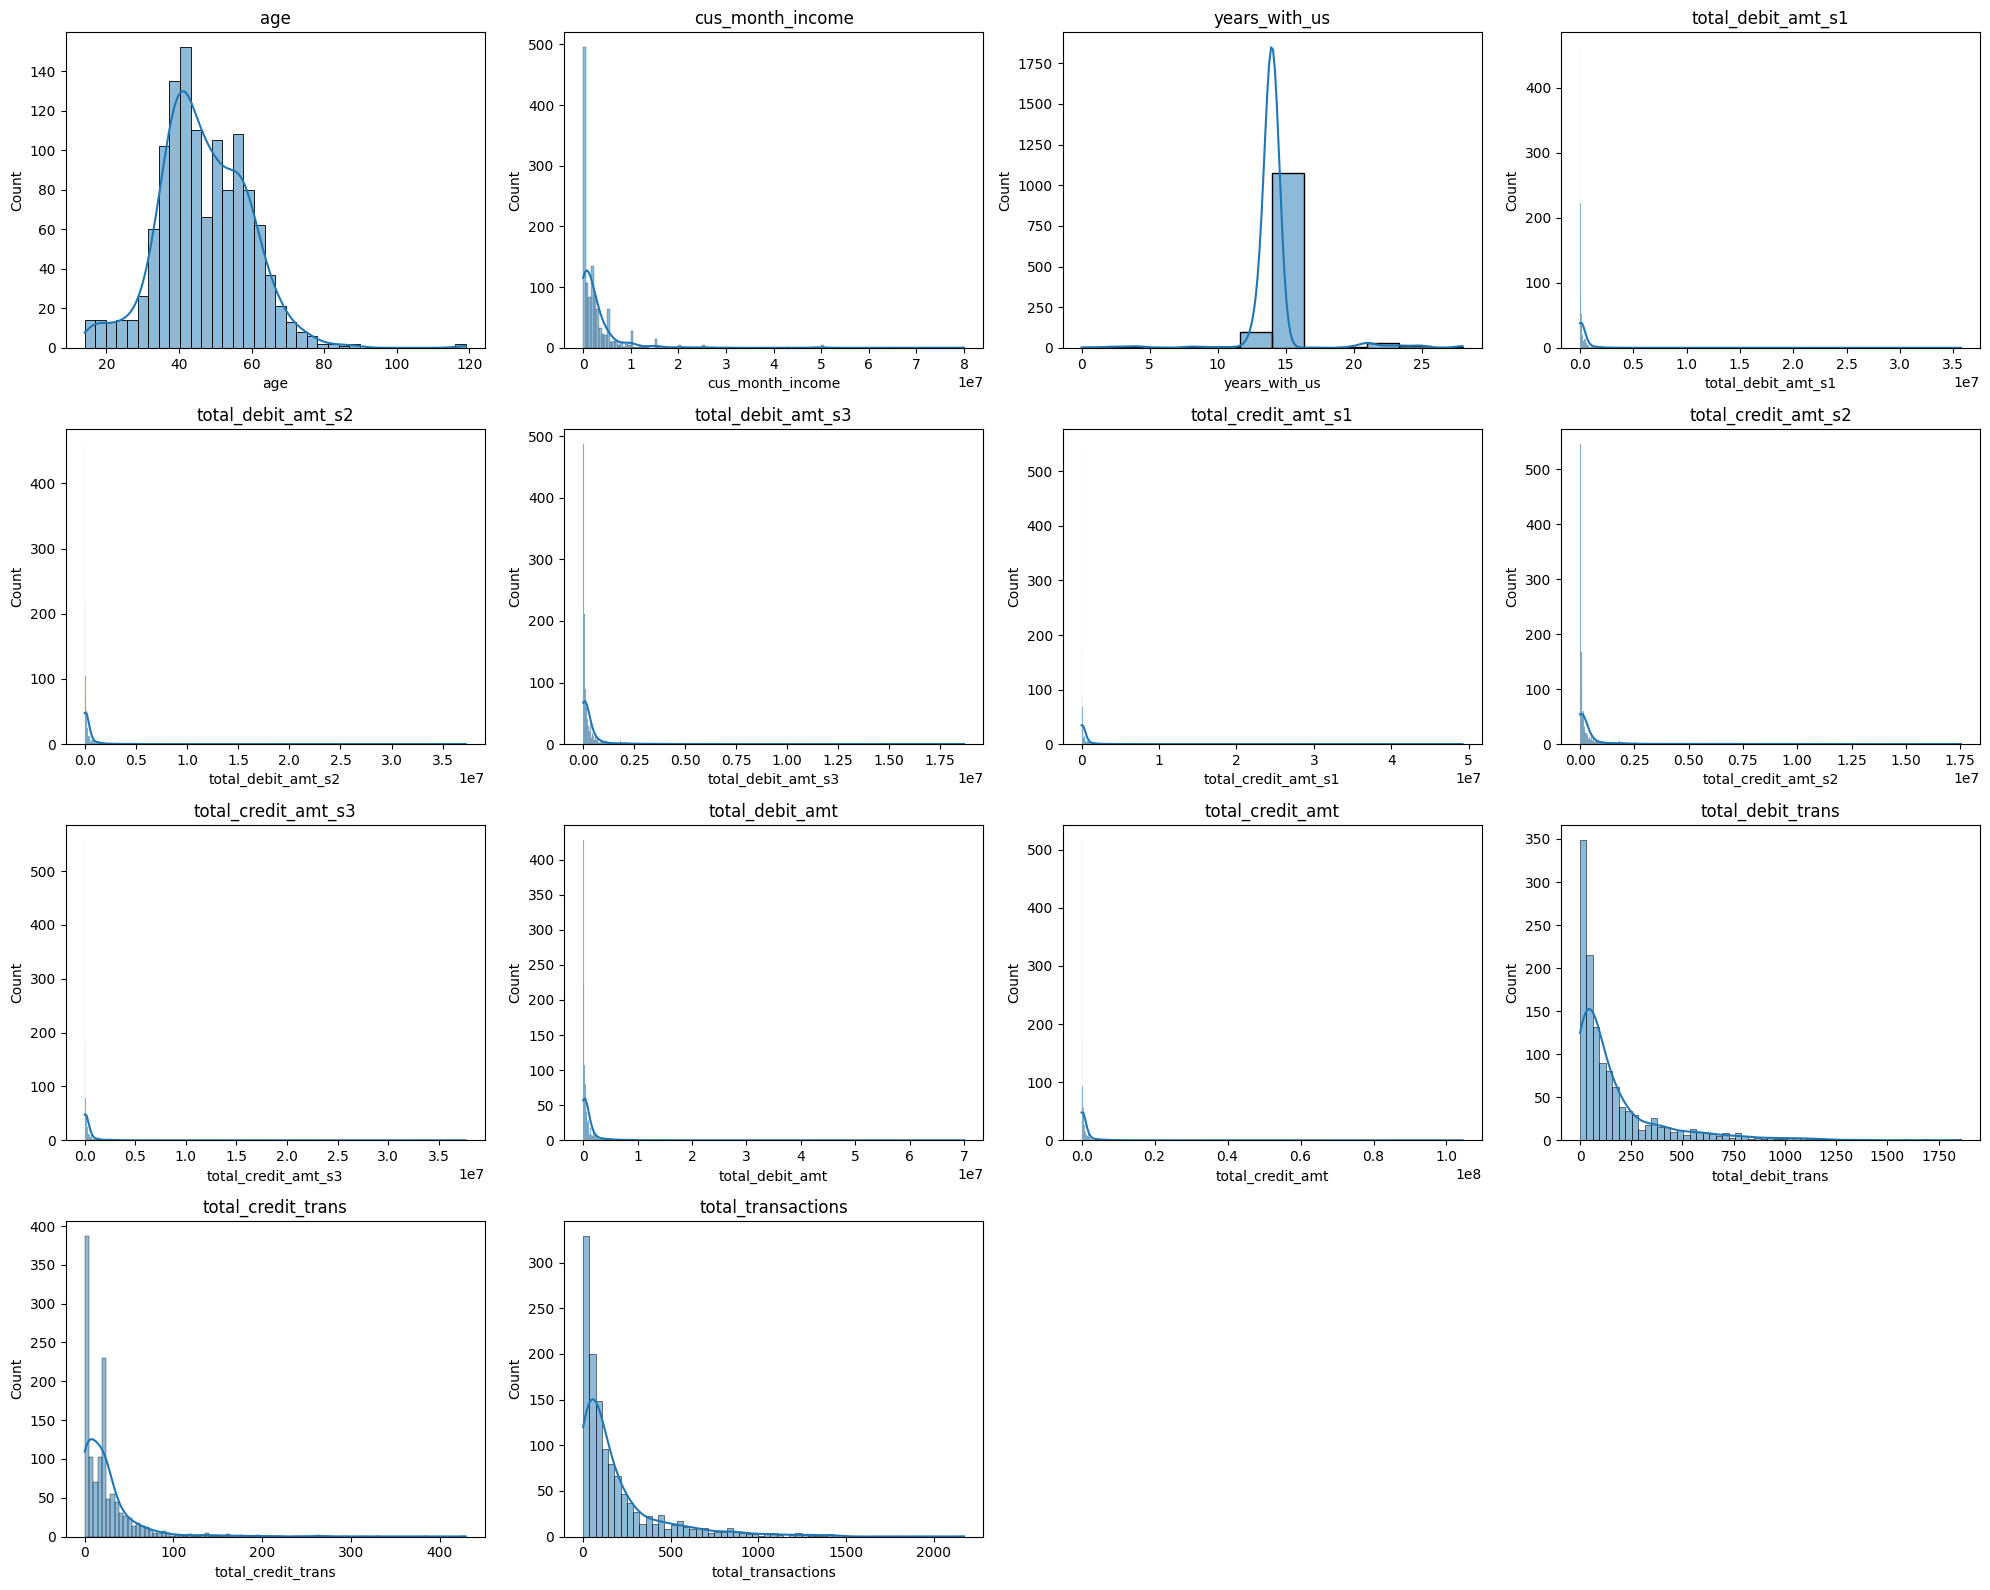

In [24]:

numeric_features = ['age', 'cus_month_income', 'years_with_us', 'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3',
                    'total_credit_amt_s1', 'total_credit_amt_s2', 'total_credit_amt_s3', 'total_debit_amt', 'total_credit_amt',
                    'total_debit_trans', 'total_credit_trans', 'total_transactions']

plt.figure(figsize=(20, 16))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()